In [2]:
# Makes possible to show the output from matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

# Makes the figures in the PNG format:
# For more information see %config InlineBackend
%config InlineBackend.figure_formats=set([u'png'])

# plt.rcParams['figure.figsize'] = 5, 10

import numpy
import sys
import os
import scipy
from scipy import stats

import save_load_file as slf

In [3]:
#
# Sets A and B: differ only on the use of STP
# Sets C and D: differ only on the use of STP
#
# Experiment identifier
sim_sets = ["set_A", "set_B", "set_C", "set_D"]

sim_set_array = ["Set A", "Set B", "Set C", "Set D"]

base_dir = "2DofArm_simulation_data"

In [4]:
# This is for the trajectory
# METRIC[noiselevel,decimationlevel,total_trials]
# METRIC_ALL[set_i,tji,noiselevel,decimationlevel,total_trials]
# The second number 4 below is related with the number of trajectories!
METRIC_ALL=numpy.zeros((4, 4, 3, 3, 50),dtype=numpy.float)
for set_number,sim_set in enumerate(sim_sets):
    for tji in range(4):
        METRIC=numpy.load("./"+base_dir+"/"+sim_set+"/metric_trajectory_trajectory_"+str(tji+1)+".npy")
        METRIC_ALL[set_number,tji]=numpy.copy(METRIC)

In [5]:
len(METRIC_ALL[0,:,0,0,:].flatten())

200

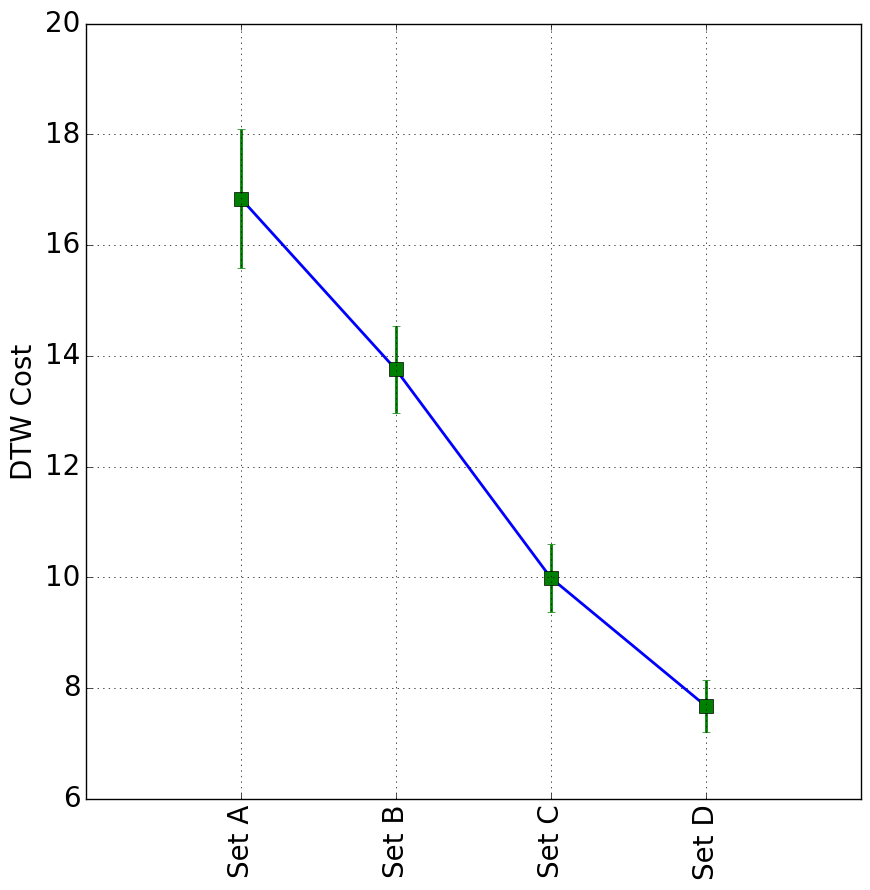

In [6]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

font = {'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.figure(figsize =(10,10))
noiselevel=0
decimationlevel=0
plt.plot(numpy.arange(len(sim_set_array)),[METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].mean() for set_i in range(len(sim_set_array))],'-',linewidth=2)
plt.errorbar(numpy.arange(len(sim_set_array)),\
             [METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].mean() for set_i in range(len(sim_set_array))],\
             [METRIC_ALL[set_i,:,noiselevel,decimationlevel,:].std()/numpy.sqrt(len(METRIC_ALL[0,:,0,0,:].flatten())) for set_i in range(len(sim_set_array))],\
             linestyle='None', marker='s', linewidth=2, markersize=10)

# plt.title("Default configurations")
# plt.title("DTW Cost (Forward Kinematics - all trajectories)")
plt.ylabel("DTW Cost")
plt.xticks(numpy.arange(len(sim_set_array)), sim_set_array, rotation='vertical')
#         plt.legend(loc=0)
plt.xlim(-1,len(sim_set_array))
plt.grid()
plt.savefig("DTW_All_Trajectories_FK.pdf", bbox_inches='tight',pad_inches=1)
plt.show()

In [7]:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind
# http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics
# http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen

# stats.ttest_ind(P1,P2, equal_var=False) performs this: https://en.wikipedia.org/wiki/Welch%27s_t_test
print "Is the noise making any difference", "(Sets A and B)?"
noiselevel=0
decimationlevel=0
P1,P2 = METRIC_ALL[0,:,noiselevel,decimationlevel,:].flatten(),METRIC_ALL[1,:,noiselevel,decimationlevel,:].flatten()        
res = stats.ttest_ind(P1,P2, equal_var=False)
print "Welch’s t-test - ", res

print "Is the noise making any difference", "(Sets C and D)?"
noiselevel=0
decimationlevel=0
P1,P2 = METRIC_ALL[2,:,noiselevel,decimationlevel,:].flatten(),METRIC_ALL[3,:,noiselevel,decimationlevel,:].flatten()        
res = stats.ttest_ind(P1,P2, equal_var=False)
print "Welch’s t-test - ", res

Is the noise making any difference (Sets A and B)?
Welch’s t-test -  Ttest_indResult(statistic=2.0922073468062661, pvalue=0.037174608008971641)
Is the noise making any difference (Sets C and D)?
Welch’s t-test -  Ttest_indResult(statistic=2.9844001399906608, pvalue=0.0030297292618047299)


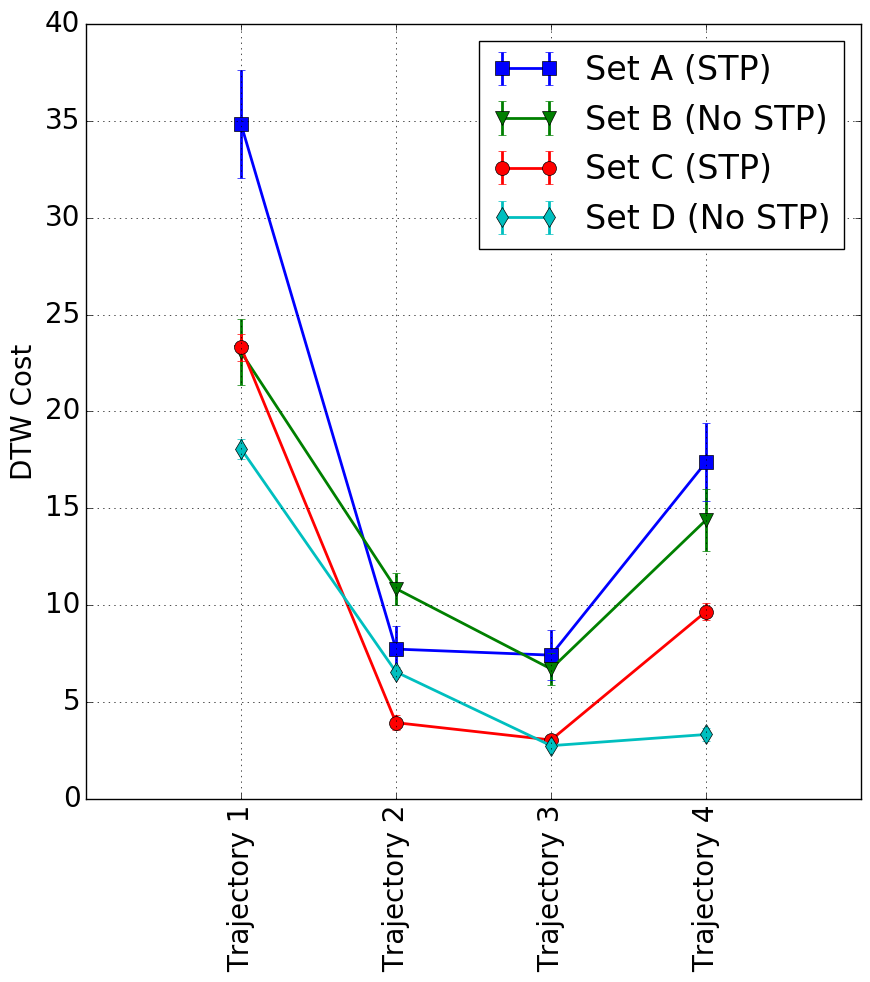

In [10]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

font = {'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.figure(figsize =(10,10))
noiselevel=0
decimationlevel=0
plt.errorbar(range(1,5),\
             METRIC_ALL[0,:,noiselevel,decimationlevel,:].mean(axis=1),\
             METRIC_ALL[0,:,noiselevel,decimationlevel,:].std(axis=1)/numpy.sqrt(50),\
             linestyle='-', marker='s', label="Set A (STP)", linewidth=2, markersize=10)
plt.errorbar(range(1,5),\
             METRIC_ALL[1,:,noiselevel,decimationlevel,:].mean(axis=1),\
             METRIC_ALL[1,:,noiselevel,decimationlevel,:].std(axis=1)/numpy.sqrt(50),\
             linestyle='-', marker='v', label="Set B (No STP)", linewidth=2, markersize=10)
plt.errorbar(range(1,5),\
             METRIC_ALL[2,:,noiselevel,decimationlevel,:].mean(axis=1),\
             METRIC_ALL[2,:,noiselevel,decimationlevel,:].std(axis=1)/numpy.sqrt(50),\
             linestyle='-', marker='o', label="Set C (STP)", linewidth=2, markersize=10)
plt.errorbar(range(1,5),\
             METRIC_ALL[3,:,noiselevel,decimationlevel,:].mean(axis=1),\
             METRIC_ALL[3,:,noiselevel,decimationlevel,:].std(axis=1)/numpy.sqrt(50),\
             linestyle='-', marker='d', label="Set D (No STP)", linewidth=2, markersize=10)

plt.ylabel("DTW Cost")
plt.xticks(range(1,5),['Trajectory '+str(i) for i in range(1,5)], rotation='vertical')
plt.legend(loc=0)
plt.xlim(0,5)
plt.grid()
plt.savefig("DTW_Individual_Trajectories_FK.pdf", bbox_inches='tight',pad_inches=1)
plt.show()

## Looking only at the forward kinematics (final trajectory), statistically there's no difference between using or not STP.

In [8]:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind
# http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics
# http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen

# stats.ttest_ind(P1,P2, equal_var=False) performs this: https://en.wikipedia.org/wiki/Welch%27s_t_test
noiselevel = 0
decimationlevel = 0
print "Is the noise making any difference", "(Sets A and B)?"
for tji in range(4):
    P1,P2 = METRIC_ALL[0,tji,noiselevel,decimationlevel,:].flatten(),METRIC_ALL[1,tji,noiselevel,decimationlevel,:].flatten()        
    print "Trajectory " + str(tji+1) +":"
    res = stats.ttest_ind(P1,P2, equal_var=False)
    print "Welch’s t-test - ", res

print 
print "Is the noise making any difference", "(Sets C and D)?"
for tji in range(4):
    P1,P2 = METRIC_ALL[2,tji,noiselevel,decimationlevel,:].flatten(),METRIC_ALL[3,tji,noiselevel,decimationlevel,:].flatten()        
    print "Trajectory " + str(tji+1) +":"
    res = stats.ttest_ind(P1,P2, equal_var=False)
    print "Welch’s t-test - ", res

Is the noise making any difference (Sets A and B)?
Trajectory 1:
Welch’s t-test -  Ttest_indResult(statistic=3.5547101196095037, pvalue=0.00063687505198723273)
Trajectory 2:
Welch’s t-test -  Ttest_indResult(statistic=-2.1608601156023375, pvalue=0.033415402555134609)
Trajectory 3:
Welch’s t-test -  Ttest_indResult(statistic=0.45678490306476205, pvalue=0.64900325848074114)
Trajectory 4:
Welch’s t-test -  Ttest_indResult(statistic=1.1438477687289104, pvalue=0.2556141150753431)

Is the noise making any difference (Sets C and D)?
Trajectory 1:
Welch’s t-test -  Ttest_indResult(statistic=6.0736356791289605, pvalue=2.9672896948979712e-08)
Trajectory 2:
Welch’s t-test -  Ttest_indResult(statistic=-5.3887259621230994, pvalue=5.9687064980871561e-07)
Trajectory 3:
Welch’s t-test -  Ttest_indResult(statistic=1.8409792799837283, pvalue=0.06896211158190399)
Trajectory 4:
Welch’s t-test -  Ttest_indResult(statistic=11.582822922704391, pvalue=1.6544709730918864e-19)


In [62]:
# 
# This cell is executed only once, because it saves the results in a file
#

# sim_set = sim_sets[1]  # ["set_A", "set_B", "set_C", "set_D"]

# # HERE I GENERATE THE DATA NECESSARY TO AVERAGE THE OUTPUT SPIKES
# noiselevel=0
# decimationlevel=0
# total_trials=50

# tji = 1

# run_number = 1

# NofN=600
# spikes = numpy.zeros((4,4,total_trials,250,NofN), dtype=numpy.int)

# for si in range(4):
#     for tji in range(1,5):
#         for run_number in range(1,total_trials+1): 
#             OutputSpks_save = slf.load_from_file("./"+base_dir+"/"+sim_sets[si]+"/OutputSpks_save_"+str(tji)+"_noise_level_"+str(noiselevel)+"_killed_neurons_"+str(decimationlevel)+"_run_"+str(run_number)+".pickles")
            
#             for tstepi in range(250):
#                 spikes[si,tji-1,run_number-1,tstepi,OutputSpks_save[tstepi,0]]=1

# numpy.save("all_spikes.npy",spikes)

In [9]:
import scipy
spikes = numpy.load("all_spikes.npy")
spikes.shape # (set_i, tji, trial_i, time_step_i, neuron_i)

(4, 4, 50, 250, 600)

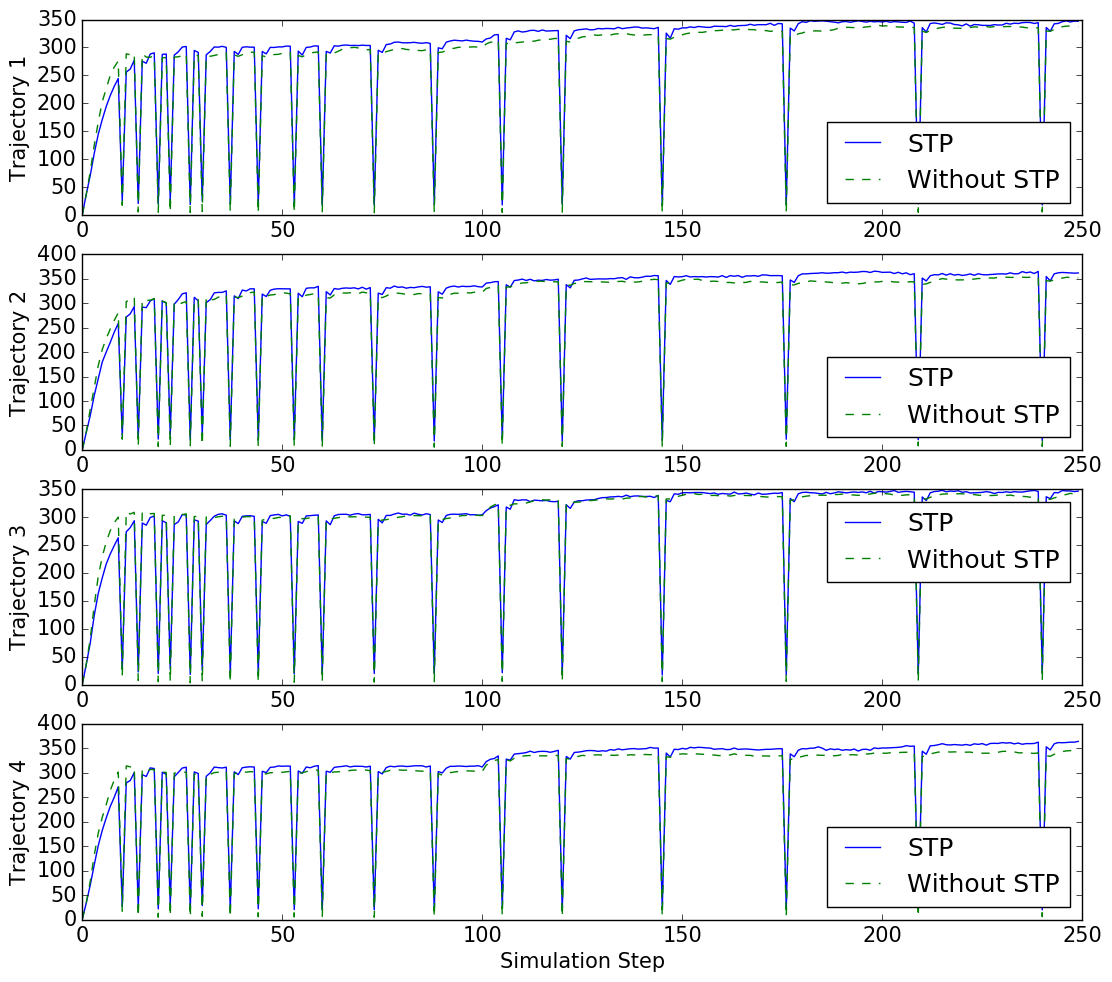

In [11]:
font = {'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

plt.figure(figsize =(10,10))
for tji in range(4):
    plt.subplot(4,1,tji+1)
    set_i = 0
    plt.plot(spikes[set_i,tji].sum(axis=0).sum(axis=1)/float(50), label="STP")
    set_i = 1
    plt.plot(spikes[set_i,tji].sum(axis=0).sum(axis=1)/float(50),'--', label="Without STP")

#     if tji==0:
#         plt.title("Average number of emitted spikes")
    
    if tji==3:
        plt.xlabel("Simulation Step")
    plt.ylabel("Trajectory "+str(tji+1))
    plt.legend(loc=0)

plt.subplots_adjust(left=0, bottom=.1, right=1, top=1, wspace=.2, hspace=.2)
plt.savefig("average_spikes_count_sets_A_B.pdf", bbox_inches='tight',pad_inches=1) 
plt.show()

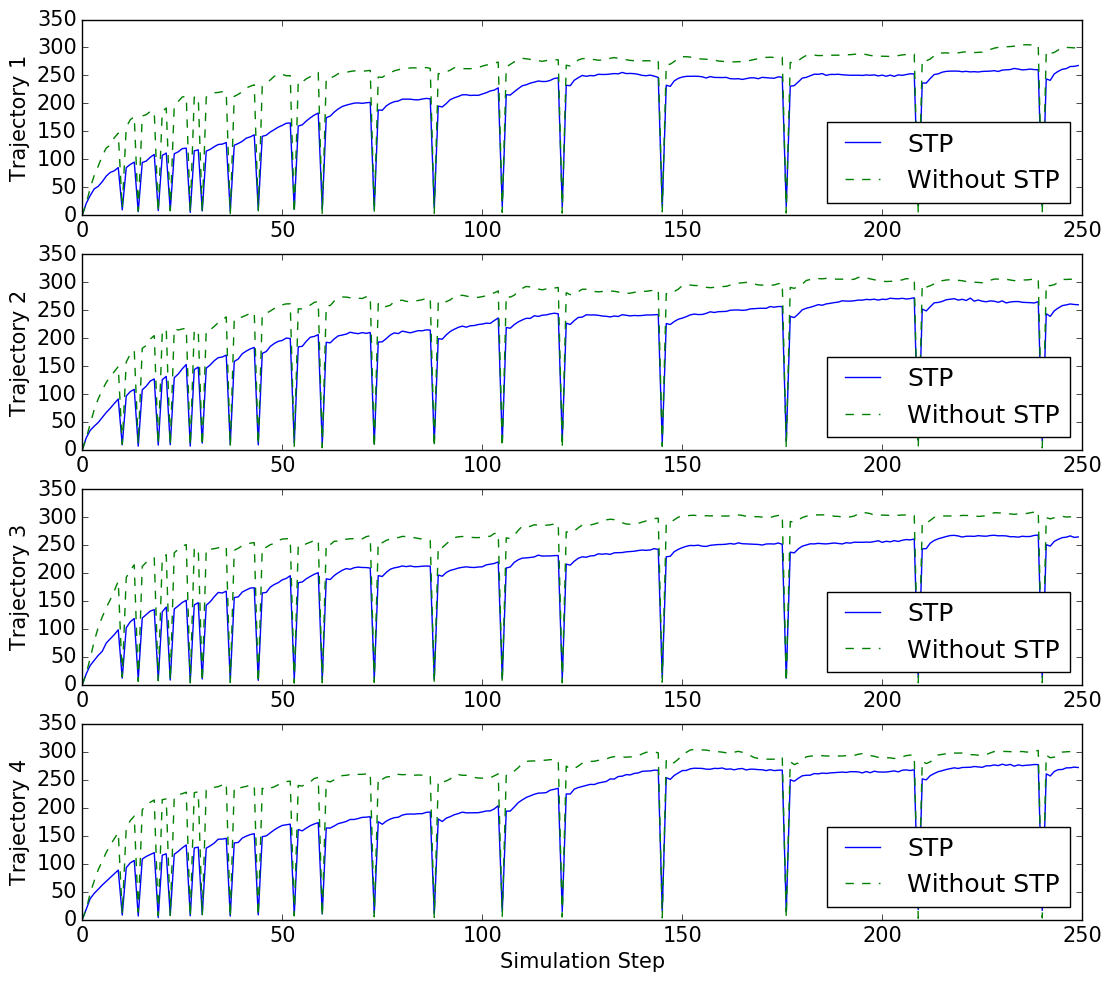

In [12]:
plt.figure(figsize =(10,10))
for tji in range(4):
    plt.subplot(4,1,tji+1)
    set_i = 2
    plt.plot(spikes[set_i,tji].sum(axis=0).sum(axis=1)/float(50), label="STP")
    set_i = 3
    plt.plot(spikes[set_i,tji].sum(axis=0).sum(axis=1)/float(50),'--', label="Without STP")

#     if tji==0:
#         plt.title("Average number of emitted spikes")
    
    if tji==3:
        plt.xlabel("Simulation Step")
    plt.ylabel("Trajectory "+str(tji+1))
    plt.legend(loc=0)

plt.subplots_adjust(left=0, bottom=.1, right=1, top=1, wspace=.2, hspace=.2)
plt.savefig("average_spikes_count_sets_C_D.pdf", bbox_inches='tight',pad_inches=1) 
plt.show()

In [32]:
run_number = 1
tji = 4

spikes_set = []
for set_i in range(4):
    spike_idx = []
    spike_times = []
    for ti,spki in enumerate(spikes[set_i,tji-1,run_number-1]>0):
        temp = numpy.arange(600)[spki]
        if len(temp):
            for idx in temp:
                spike_idx.append(idx)
                spike_times.append(ti)
    spikes_set.append([numpy.array(spike_times),numpy.array(spike_idx)])

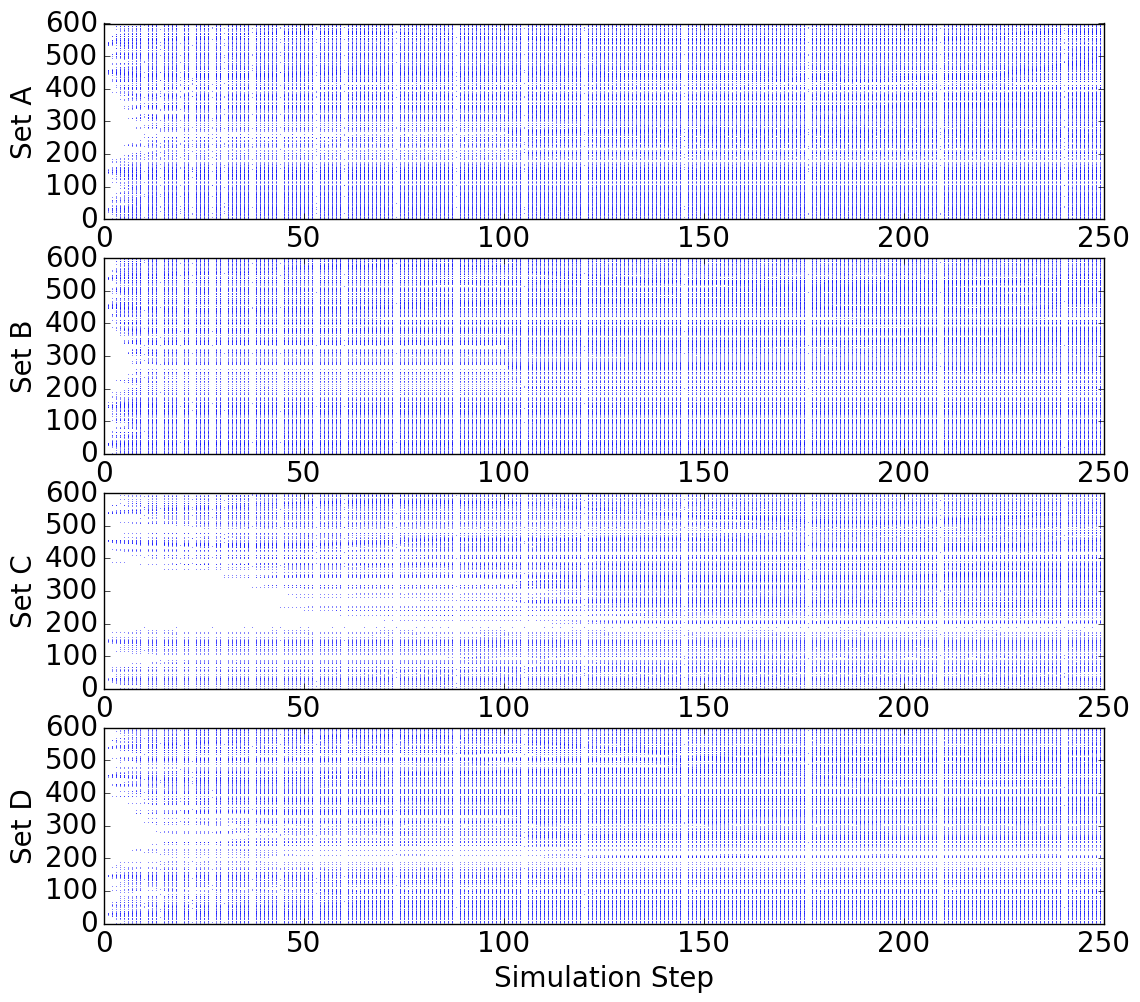

In [33]:
plt.figure(figsize =(10,10))
for set_i in range(4):
    plt.subplot(4,1,set_i+1)
    plt.plot(spikes_set[set_i][0],spikes_set[set_i][1],'.', markersize=.3)

#     if set_i==0:
#         plt.title("Output Spikes - Trajectory " + str(tji))
    
    if set_i==3:
        plt.xlabel("Simulation Step")
    plt.ylabel("Set " + ["A", "B", "C", "D"][set_i])

plt.subplots_adjust(left=0, bottom=.1, right=1, top=1, wspace=.2, hspace=.2)
plt.savefig("example_generated_spikes"+str(tji)+".png", bbox_inches='tight',pad_inches=1,dpi=300)
plt.show()